# Notebook to visualize MRI modalities

In [1]:
import SimpleITK as sitk
# from downloaddata import fetch_data as fdata
%matplotlib notebook
from extensies import gui
from extensies import registration_gui as rgui
from extensies import preprocessing as ppcs
from extensies import normalization
from siamese.dataset import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from extensies import metrics as mt
import os
import re 
OUTPUT_DIR = 'output'

## Show data before preprocessing

In [2]:
df_images = pd.read_csv('../../data/info/ProstateX-Images-Train.csv')
df_findings = pd.read_csv('../../data/info/ProstateX-Findings-Train.csv')
df_ktrans = pd.read_csv('../../data/info/ProstateX-Images-KTrans-Train.csv')

In [9]:
# visualize pair of 3D data to detail analyze
def show_images(fixed_image,moving_image,name,findings):
    pos = findings[findings['ProxID'] == name]['pos']
    for x in pos:
        center = [float(x) for x in x.split()] 
        print(fixed_image.TransformPhysicalPointToContinuousIndex(center),
             moving_image.TransformPhysicalPointToContinuousIndex(center))
        
    initial_transform = sitk.CenteredTransformInitializer(fixed_image, 
                                                      moving_image, 
                                                      sitk.Euler3DTransform(), 
                                                      sitk.CenteredTransformInitializerFilter.GEOMETRY)

    gui.RegistrationPointDataAquisition(fixed_image, moving_image, figure_size=(8,4), known_transformation=initial_transform)

In [10]:
# function to load raw data from dataset
def load_images(name):
    fixed_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(ppcs.get_path(name, 't2tsetra', '../../data/PROSTATEx'))
    moving_series_filenames = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(ppcs.get_path(name, 'adc', '../../data/PROSTATEx'))

    t2w_image = sitk.ReadImage(fixed_series_filenames, sitk.sitkFloat32)
    adc_image = sitk.ReadImage(moving_series_filenames, sitk.sitkFloat32)
    ktrans_image = sitk.ReadImage(os.path.join('../../data/','Ktrans',name,name +'-Ktrans.mhd'), sitk.sitkFloat32)
    
    return t2w_image,adc_image,ktrans_image

4-t2tsetra-00702
7-ep2ddifftraDYNDISTADC-48780
(166.7983203860048, 223.92334587212486, 8.49784164425388) (56.09947522225901, 75.14113122605508, 7.497863258221661)


<IPython.core.display.Javascript object>


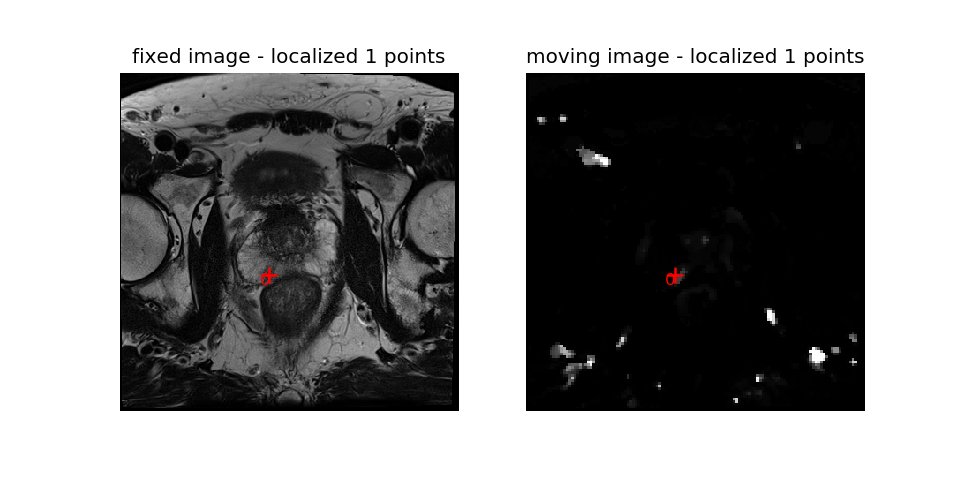

In [11]:
# define name of patient to show his images
name = 'ProstateX-0000'

t2w_image,adc_image,ktrans_image = load_images(name)
show_images(t2w_image, ktrans_image, name, df_findings)

(166.7983203860048, 223.92334587212486, 8.49784164425388) (35.699581075711286, 71.98083595949288, 8.497845967399524)


<IPython.core.display.Javascript object>


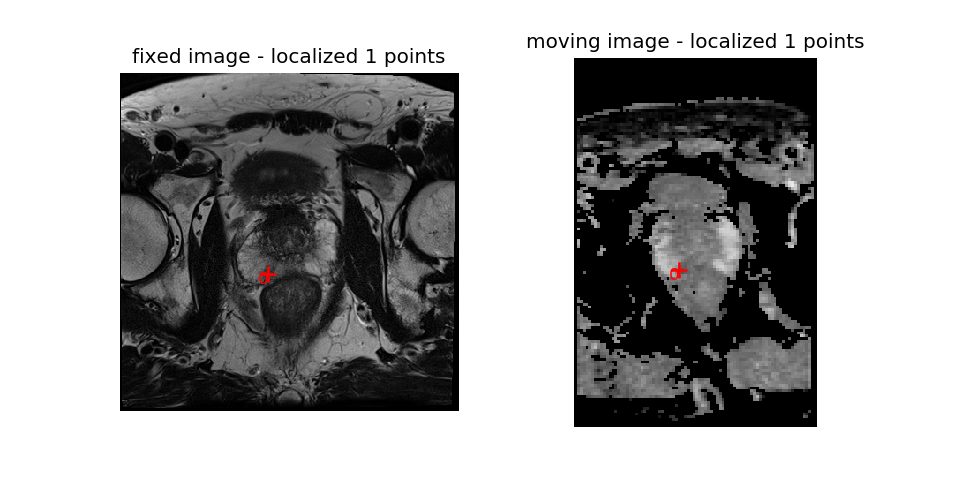

In [7]:
show_images(t2w_image, adc_image, name, df_findings)

(56.09947522225901, 75.14113122605508, 7.497863258221661) (35.699581075711286, 71.98083595949288, 8.497845967399524)


<IPython.core.display.Javascript object>


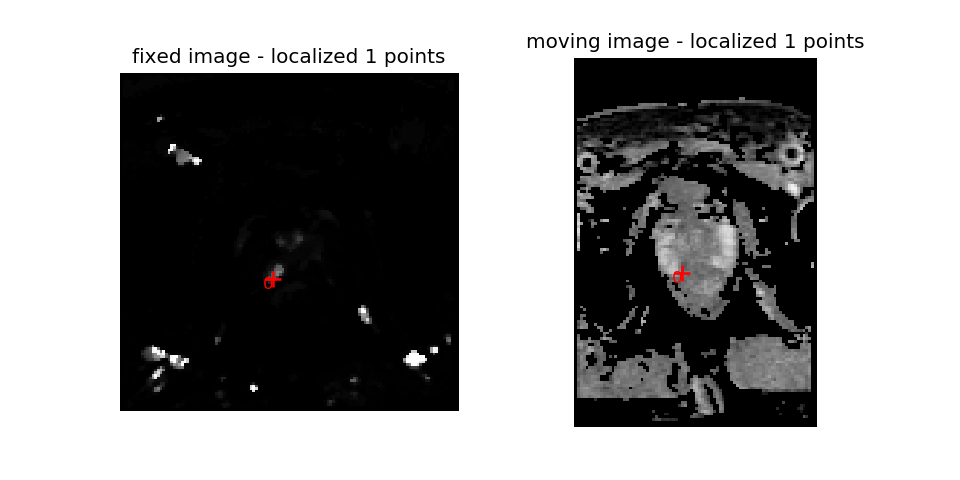

In [8]:
show_images(ktrans_image, adc_image, name, df_findings)

## Show images after preprocessing
we visualize all used modalieties together for one finding

In [18]:
modalities = ['t2tsetra/t/40x40x1/',
              'adc/t/40x40x1/',
              'ktrans/t/40x40x1/',
              'cbval/t/40x40x1/'   
             ]
loader = DataLoader('../../data/',modalities)

x = loader.load_data()

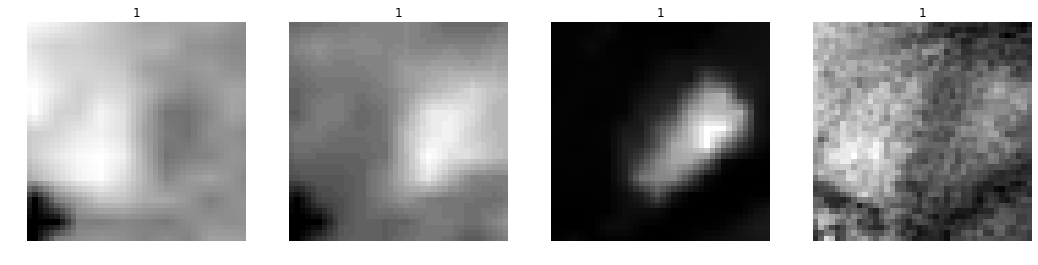

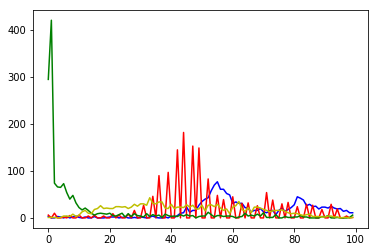

In [19]:
x,y = loader.get_data_by_index(idx = 0)
mt.show_image(np.array([0,1,2,3]),x,y)

histograms = [None] * len(x)
for idx,volume in enumerate(x):
    volume = volume[volume > 0]
    hist = np.histogram(volume,100)[0]
    histograms[idx] = hist
histograms = np.array(histograms)

plt.plot(np.arange(100),histograms[0], 'b')
plt.plot(np.arange(100),histograms[1], 'r')
plt.plot(np.arange(100),histograms[2], 'g')
plt.plot(np.arange(100),histograms[3], 'y')

### ADC+Bval+Ktrans

combination of modalities in one RGB image

In [20]:
modalities = ['adc/t/40x40x1/',
              'ktrans/t/40x40x1/',
              'cbval/t/40x40x1/'
             ]
loader = DataLoader('../../data/',modalities)
loader.load_data()
x_c,y_c = loader.combine_channels(modalities)

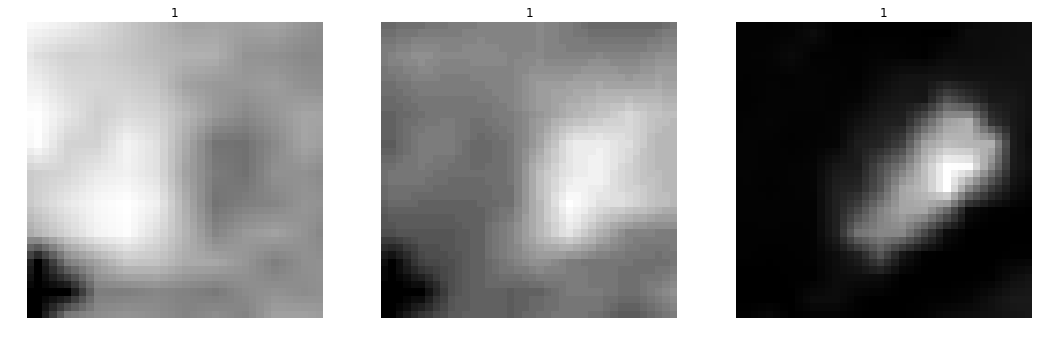

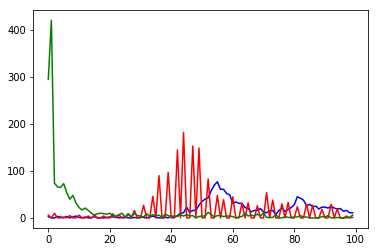

In [23]:
idx = 0
x,y = loader.get_data_by_index(idx = idx)
mt.show_image(np.array([0,1,2]),x,y)

histograms = [None] * len(x)
for idx,volume in enumerate(x):
    volume = volume[volume > 0]
    hist = np.histogram(volume,100)[0]
    histograms[idx] = hist
histograms = np.array(histograms)

plt.plot(np.arange(100),histograms[0], 'b')
plt.plot(np.arange(100),histograms[1], 'r')
plt.plot(np.arange(100),histograms[2], 'g')

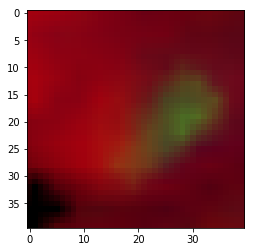

In [24]:
plt.imshow(x_c[0])